<a href="https://colab.research.google.com/github/kedimonmuo/Keras-image_detection/blob/main/NN_SentimentAnalysis_ResNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ResNet50 Model for Sentiment Analysis

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import layers, models
from keras.preprocessing.image import load_img
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import ResNet50
from keras.applications.resnet50 import preprocess_input
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
import os

In [2]:
# Fetching Kaggle.json file and getting datasset with API
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"eceturgut","key":"78dbc486d9cfc36523e5b809fac83200"}'}

In [3]:
!pip install -q kaggle

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [5]:
!kaggle datasets download -d jonathanoheix/face-expression-recognition-dataset

100% 120M/121M [00:02<00:00, 60.4MB/s]
100% 121M/121M [00:02<00:00, 55.4MB/s]


In [6]:
zip_path = '/content/face-expression-recognition-dataset.zip'
# we still need to unzzip to make it work

In [7]:
import zipfile

# Define the path to the uploaded ZIP file
zip_path = '/content/face-expression-recognition-dataset.zip'

# Define the directory where you want to extract the contents
extract_path = '/content/extracted_data/'

# Create the extraction directory if it doesn't exist
if not os.path.exists(extract_path):
    os.makedirs(extract_path)

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

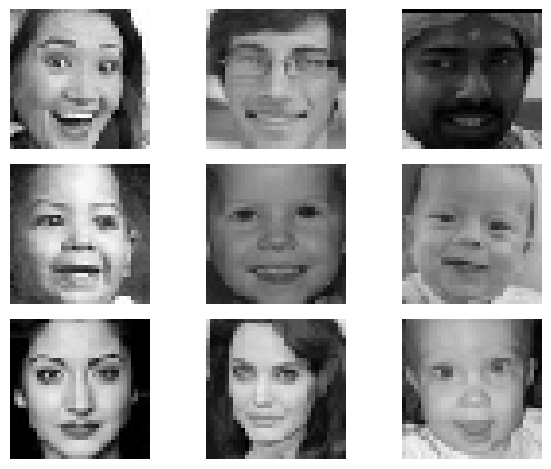

In [11]:
 #lets itirate over happy faced images in path
images = "/content/extracted_data/images"
expression = "happy"

for i in range(min(9, len(images))):
  img_path = os.path.join(images, "images", "train", expression, images[i])
  img = load_img(images+ "/train/" +expression+"/"+
    os.listdir(images+ "/train/"+expression)[i], target_size=(36,36))
  plt.subplot(3, 3, i + 1)
  plt.imshow(img)
  plt.axis("off")

plt.tight_layout()
plt.show()

# Train test split and Data Augmentation (Generators)

In [19]:
# Define sizeas and path variable
images = "/content/extracted_data/images"
image_size = (224, 224)  # Adjust based on input size expected by ResNet50
batch_size = 32
no_of_classes =7

#classes=['happy', 'sad', 'angry', 'fear', 'disgust', 'neutral', 'suprise']
# But no need re-defining because they are One-hot encoded as in categorical class.

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode= "nearest",
    width_shift_range= 0.2,
    validation_split=0.2,
)

# Load and split the dataset
train_generator = train_datagen.flow_from_directory(
    images+ "/train",
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')


validation_generator = ImageDataGenerator(rescale= 1./255)
validation_generator = validation_generator.flow_from_directory(
    images+ "/validation",  # there was a mistake previous path, corrected
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')



Found 23060 images belonging to 7 classes.
Found 0 images belonging to 7 classes.


 # ResNet50 Model building

In [ ]:
## Editing model Hyperparameters and Optimizers

In [26]:
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

In [20]:
image_size = (224, 224)  # Adjust based on input size expected by ResNet50
batch_size = 32
no_of_classes =7

# Build the model (ResNet50 as the base)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),  # Additional hidden layer
    layers.Dropout(0.5),
    layers.Dense(7, activation='softmax')  # 7 output classes for 7 sentiments
])



In [29]:
# Compile the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss= "categorical_crossentropy",
              metrics=['accuracy']
              )


In [24]:
# Define early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

In [30]:
# Train the model with early stopping
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator,
    callbacks=[early_stopping]
)

Epoch 1/30
721/721 [==============================] - ETA: 0s - loss: 1.8446 - accuracy: 0.2327

721/721 [==============================] - 344s 405ms/step - loss: 1.8446 - accuracy: 0.2327
Epoch 2/30
721/721 [==============================] - ETA: 0s - loss: 1.8148 - accuracy: 0.2485

721/721 [==============================] - 293s 406ms/step - loss: 1.8148 - accuracy: 0.2485
Epoch 3/30
721/721 [==============================] - ETA: 0s - loss: 1.8135 - accuracy: 0.2486

721/721 [==============================] - 294s 408ms/step - loss: 1.8135 - accuracy: 0.2486
Epoch 4/30
721/721 [==============================] - ETA: 0s - loss: 1.8133 - accuracy: 0.2486

721/721 [==============================] - 298s 413ms/step - loss: 1.8133 - accuracy: 0.2486
Epoch 5/30
721/721 [==============================] - ETA: 0s - loss: 1.8124 - accuracy: 0.2486

721/721 [==============================] - 299s 414ms/step - loss: 1.8124 - accuracy: 0.2486
Epoch 6/30
721/721 [==============================] - ETA: 0s - loss: 1.8142 - accuracy: 0.2486

721/721 [==============================] - 297s 413ms/step - loss: 1.8142 - accuracy: 0.2486
Epoch 7/30
721/721 [==============================] - ETA: 0s - loss: 1.8124 - accuracy: 0.2486

721/721 [==============================] - 289s 400ms/step - loss: 1.8124 - accuracy: 0.2486
Epoch 8/30
721/721 [==============================] - ETA: 0s - loss: 1.8131 - accuracy: 0.2484

721/721 [==============================] - 294s 408ms/step - loss: 1.8131 - accuracy: 0.2484
Epoch 9/30
721/721 [==============================] - ETA: 0s - loss: 1.8120 - accuracy: 0.2486

721/721 [==============================] - 289s 401ms/step - loss: 1.8120 - accuracy: 0.2486
Epoch 10/30
721/721 [==============================] - ETA: 0s - loss: 1.8121 - accuracy: 0.2486

721/721 [==============================] - 290s 402ms/step - loss: 1.8121 - accuracy: 0.2486
Epoch 11/30
721/721 [==============================] - ETA: 0s - loss: 1.8119 - accuracy: 0.2486

721/721 [==============================] - 288s 400ms/step - loss: 1.8119 - accuracy: 0.2486
Epoch 12/30
721/721 [==============================] - ETA: 0s - loss: 1.8123 - accuracy: 0.2486

721/721 [==============================] - 296s 410ms/step - loss: 1.8123 - accuracy: 0.2486
Epoch 13/30
721/721 [==============================] - ETA: 0s - loss: 1.8121 - accuracy: 0.2486

721/721 [==============================] - 291s 403ms/step - loss: 1.8121 - accuracy: 0.2486
Epoch 14/30
721/721 [==============================] - ETA: 0s - loss: 1.8116 - accuracy: 0.2486

721/721 [==============================] - 299s 414ms/step - loss: 1.8116 - accuracy: 0.2486
Epoch 15/30
721/721 [==============================] - ETA: 0s - loss: 1.8122 - accuracy: 0.2486

721/721 [==============================] - 298s 413ms/step - loss: 1.8122 - accuracy: 0.2486
Epoch 16/30
721/721 [==============================] - ETA: 0s - loss: 1.8117 - accuracy: 0.2486

721/721 [==============================] - 306s 424ms/step - loss: 1.8117 - accuracy: 0.2486
Epoch 17/30
721/721 [==============================] - ETA: 0s - loss: 1.8120 - accuracy: 0.2486

721/721 [==============================] - 289s 401ms/step - loss: 1.8120 - accuracy: 0.2486
Epoch 18/30
721/721 [==============================] - ETA: 0s - loss: 1.8116 - accuracy: 0.2486

721/721 [==============================] - 296s 410ms/step - loss: 1.8116 - accuracy: 0.2486
Epoch 19/30
721/721 [==============================] - ETA: 0s - loss: 1.8120 - accuracy: 0.2486

721/721 [==============================] - 284s 394ms/step - loss: 1.8120 - accuracy: 0.2486
Epoch 20/30
721/721 [==============================] - ETA: 0s - loss: 1.8114 - accuracy: 0.2486

721/721 [==============================] - 300s 416ms/step - loss: 1.8114 - accuracy: 0.2486
Epoch 21/30
721/721 [==============================] - ETA: 0s - loss: 1.8118 - accuracy: 0.2486

721/721 [==============================] - 304s 422ms/step - loss: 1.8118 - accuracy: 0.2486
Epoch 22/30
721/721 [==============================] - ETA: 0s - loss: 1.8114 - accuracy: 0.2486

721/721 [==============================] - 285s 396ms/step - loss: 1.8114 - accuracy: 0.2486
Epoch 23/30
721/721 [==============================] - ETA: 0s - loss: 1.8120 - accuracy: 0.2486

721/721 [==============================] - 288s 399ms/step - loss: 1.8120 - accuracy: 0.2486
Epoch 24/30
721/721 [==============================] - ETA: 0s - loss: 1.8120 - accuracy: 0.2486

721/721 [==============================] - 286s 397ms/step - loss: 1.8120 - accuracy: 0.2486
Epoch 25/30
721/721 [==============================] - ETA: 0s - loss: 1.8119 - accuracy: 0.2486

721/721 [==============================] - 289s 401ms/step - loss: 1.8119 - accuracy: 0.2486
Epoch 26/30
721/721 [==============================] - ETA: 0s - loss: 1.8116 - accuracy: 0.2486

721/721 [==============================] - 284s 393ms/step - loss: 1.8116 - accuracy: 0.2486
Epoch 27/30
721/721 [==============================] - ETA: 0s - loss: 1.8114 - accuracy: 0.2486

721/721 [==============================] - 290s 402ms/step - loss: 1.8114 - accuracy: 0.2486
Epoch 28/30
721/721 [==============================] - ETA: 0s - loss: 1.8117 - accuracy: 0.2486

721/721 [==============================] - 287s 398ms/step - loss: 1.8117 - accuracy: 0.2486
Epoch 29/30
721/721 [==============================] - ETA: 0s - loss: 1.8115 - accuracy: 0.2486

721/721 [==============================] - 287s 398ms/step - loss: 1.8115 - accuracy: 0.2486
Epoch 30/30
721/721 [==============================] - ETA: 0s - loss: 1.8112 - accuracy: 0.2486

721/721 [==============================] - 291s 403ms/step - loss: 1.8112 - accuracy: 0.2486


In [40]:
history.history.keys()


dict_keys(['loss', 'accuracy'])

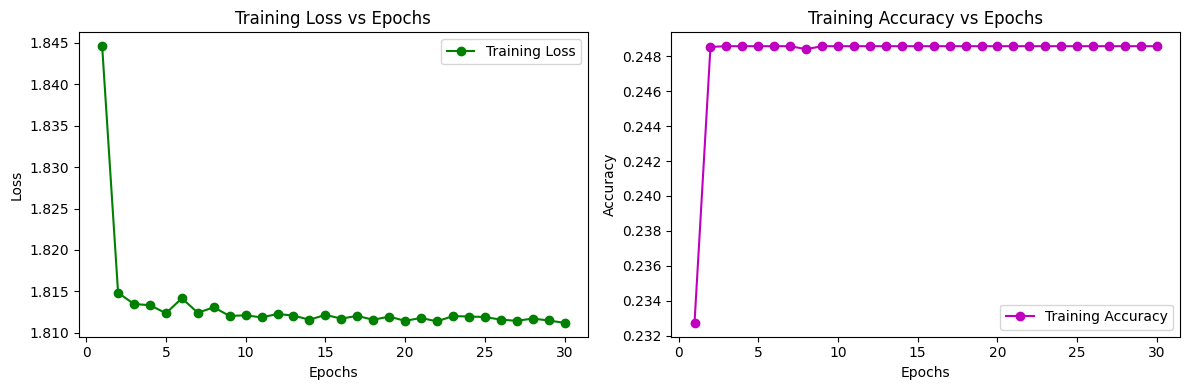

In [42]:

# Metrics we have loss and accuracy
loss = history.history['loss']
accuracy = history.history.get('accuracy')

epochs = range(1, len(loss) + 1)

# Plotting Loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'go-', label='Training Loss')  # green with circular markers connected by a solid line
plt.title('Training Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


# Plotting Accuracy
if accuracy:
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, 'mo-', label='Training Accuracy')
    plt.title('Training Accuracy vs Epochs')   # magenta markers with solid line
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Observe also validation loss - accuracy for better evaluation.